In [1]:
import geopandas as gpd
import geoplot as gplt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fiona
%matplotlib inline
# Importamos para escala de color de porcentaje
from matplotlib import cm
from matplotlib import colors

# Importamos el archivo y arreglamos los datos para analizarlos.

In [13]:
# importamos el archivo.csv
cn = pd.read_csv("ConectividadalserviciodeInternet_2638001589899846118.csv", delimiter = ",")

In [14]:
# Analizamos las columnas para conocerlas con sus nombres
cn.columns

Index(['Provincia', 'Partido', 'Localidad', 'Población', 'ADSL', 'Cablemódem',
       'Dial Up', 'Fibra óptica', 'Satelital', 'Wireless', 'Telefonía Fija',
       '3G', '4G', 'Latitud', 'Longitud', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [4]:
# Eliminamos las columna (axis=1) (para filas (axis=0)) que no sirven para nuestro análisis
#con la condición que imponemos pw.drop('identificador', axis=1, inplace=True)
cn.drop('Partido', axis=1, inplace=True)
cn.drop('Población', axis=1, inplace=True)
cn.drop('Unnamed: 15', axis=1, inplace=True)
cn.drop('Unnamed: 16', axis=1, inplace=True)
cn.drop('Unnamed: 17', axis=1, inplace=True)
cn.drop('Unnamed: 18', axis=1, inplace=True)
cn.drop('Unnamed: 19', axis=1, inplace=True)

In [5]:
# Reemplazamos los string por números para contarlos como int().

### Columna ADSL ###
cn['ADSL'] = cn['ADSL'].replace('SI', '1')
cn['ADSL'] = cn['ADSL'].replace('--', '0')
# Cambianos de tipos de datos de la columna a str y convertimos a dictionary para sumar.
ADSL = dict(cn['ADSL'].astype(str).value_counts())
#print(ADSL)

### Columna Cablemódem ###
# Como el nombre de la columna Cablemódem puede presentar problemas, lo renombramos como Cablemodem.
cn.rename(columns={'Cablemódem': 'Cablemodem'}, inplace=True)
# Reemplazo los string por números para contarlos como int().
cn['Cablemodem'] = cn['Cablemodem'].replace('SI', '1')
cn['Cablemodem'] = cn['Cablemodem'].replace('--', '0')
# Cambianos de tipos de datos de la columna a str y convertimos a dictionary para sumar.
Cablemodem = dict(cn['Cablemodem'].astype(str).value_counts())

### Columna Dial Up ###
# Como el nombre de la columna Dial Up presenta problemas, la renombramos como Dialup.
cn.rename(columns={'Dial Up': 'Dialup'}, inplace=True)
# Reemplazo los string por números para contarlos como int().
cn['Dialup'] = cn['Dialup'].replace('SI', '1')
cn['Dialup'] = cn['Dialup'].replace('--', '0')
# Cambianos de tipos de datos de la columna a str y convertimos a dictionary para sumar.
Dialup = dict(cn['Dialup'].astype(str).value_counts())

### Columna Fibra óptica ###
# Como el nombre de la columna Fibra óptica presenta problemas, la renombramos como Fibraoptica.
cn.rename(columns={'Fibra óptica': 'Fibraoptica'}, inplace=True)
# Reemplazo los string por números para contarlos como int().
cn['Fibraoptica'] = cn['Fibraoptica'].replace('SI', '1')
cn['Fibraoptica'] = cn['Fibraoptica'].replace('--', '0')
# Cambianos de tipos de datos de la columna a str y convertimos a dictionary para sumar.
Fibraoptica = dict(cn['Fibraoptica'].astype(str).value_counts())

### Columna Satelital ###
# Reemplazo los string por números para contarlos como int().
cn['Satelital'] = cn['Satelital'].replace('SI', '1')
cn['Satelital'] = cn['Satelital'].replace('--', '0')
# Cambianos de tipos de datos de la columna a str y convertimos a dictionary para sumar.
Satelital = dict(cn['Satelital'].astype(str).value_counts())

### Columna Wireless ###
# Reemplazo los string por números para contarlos como int().
cn['Wireless'] = cn['Wireless'].replace('SI', '1')
cn['Wireless'] = cn['Wireless'].replace('--', '0')
# Cambianos de tipos de datos de la columna a str y convertimos a dictionary para sumar.
Wireless = dict(cn['Wireless'].astype(str).value_counts())

### Columna Telefonía Fija ###
# Como el nombre de la columna Fibra óptica presenta problemas, la renombramos como Fibraoptica.
cn.rename(columns={'Telefonía Fija': 'Telefoniafija'}, inplace=True)
# Reemplazo los string por números para contarlos como int().
cn['Telefoniafija'] = cn['Telefoniafija'].replace('SI', '1')
cn['Telefoniafija'] = cn['Telefoniafija'].replace('--', '0')
# Cambianos de tipos de datos de la columna a str y convertimos a dictionary para sumar.
Telefoniafija = dict(cn['Telefoniafija'].astype(str).value_counts())

### Columna 3G ###
# Como el nombre de la columna 3G presenta problemas, la renombramos como Tresg.
cn.rename(columns={'3G': 'Tresg'}, inplace=True)
# Reemplazo los string por números para contarlos como int().
cn['Tresg'] = cn['Tresg'].replace('SI', '1')
cn['Tresg'] = cn['Tresg'].replace('--', '0')
# Cambianos de tipos de datos de la columna a str y convertimos a dictionary para sumar.
Tresg = dict(cn['Tresg'].astype(str).value_counts())

### Columna 4G ###
# Como el nombre de la columna 4G presenta problemas, la renombramos como Cuatrog.
cn.rename(columns={'4G': 'Cuatrog'}, inplace=True)
# Reemplazo los string por números para contarlos como int().
cn['Cuatrog'] = cn['Cuatrog'].replace('SI', '1')
cn['Cuatrog'] = cn['Cuatrog'].replace('--', '0')
# Cambianos de tipos de datos de la columna a str y convertimos a dictionary para sumar.
Cuatrog = dict(cn['Cuatrog'].astype(str).value_counts())

   # Porcentual de cada tipo de acceso de internet respecto del total de las conexiones del  país por cada municipio

La conexión ADSL representa un 9.2% del total.
La conexión Cablemodem representa un 5.72% del total.
La conexión Dial up representa un 3.81% del total.
La conexión Fibra óptica representa un 6.17% del total.
La conexión Satelital representa un 9.56% del total.
La conexión Wireless representa un 10.58% del total.
La conexión Telefonía fija representa un 18.67% del total.
La conexión 3G representa un 18.45% del total.
La conexión 4G representa un 17.85% del total.


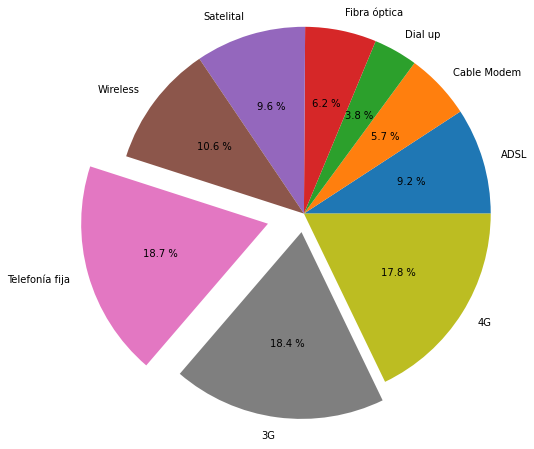

In [6]:
# Calculamos cada representación porcentual respecto a la conexión total del pais 
cnpais = ADSL['1'] + Cablemodem['1'] + Dialup['1'] + Fibraoptica['1'] + Satelital['1'] + Wireless['1'] + Telefoniafija['1'] + Tresg['1'] + Cuatrog['1']
print("La conexión ADSL representa un "+ str(round((ADSL['1']/cnpais)*100,2)) +"%" + " del total.")
print("La conexión Cablemodem representa un "+ str(round((Cablemodem['1']/cnpais)*100,2)) +"%" + " del total.")
print("La conexión Dial up representa un "+ str(round((Dialup['1']/cnpais)*100,2)) +"%" + " del total.")
print("La conexión Fibra óptica representa un "+ str(round((Fibraoptica['1']/cnpais)*100,2)) +"%" + " del total.")
print("La conexión Satelital representa un "+ str(round((Satelital['1']/cnpais)*100,2)) +"%" + " del total.")
print("La conexión Wireless representa un "+ str(round((Wireless['1']/cnpais)*100,2)) +"%" + " del total.")
print("La conexión Telefonía fija representa un "+ str(round((Telefoniafija['1']/cnpais)*100,2)) +"%" + " del total.")
print("La conexión 3G representa un "+ str(round((Tresg['1']/cnpais)*100,2)) +"%" + " del total.")
print("La conexión 4G representa un "+ str(round((Cuatrog['1']/cnpais)*100,2)) +"%" + " del total.")

# Los porcentuales y los nombres/etiquetes debemos convertirlos en listas
porcentaje = [9.2, 5.72, 3.81, 6.17, 9.56, 10.58, 18.67, 18.45, 17.85]
nombres = ['ADSL', 'Cable Modem', 'Dial up', 'Fibra óptica', 'Satelital', 'Wireless', 'Telefonía fija', '3G', '4G']
#Regulamos el tamaño
plt.figure(figsize=(8,8))
# Desfasamos una tajada, las importante.
desfase = (0, 0, 0, 0, 0, 0, 0.2, 0.1, 0)
# colocamos porcentaje y nombres en plt.pie()
plt.pie(porcentaje, labels=nombres, autopct="%0.1f %%", explode=desfase)
plt.axis("equal")
plt.show()

# Comparación entre tipos de tecnología de acceso a internet del total país

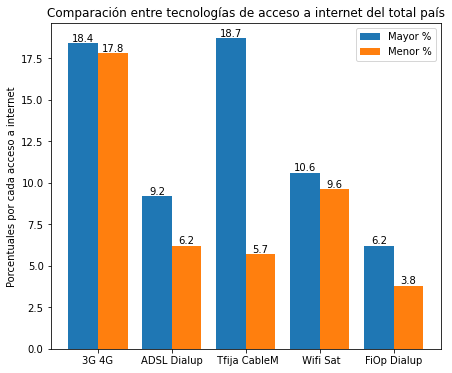

In [7]:
#Configuramos las etiquetas/usamos espacios entre dos palabras para ubicar debajo de cada barra.
etiquetas_x = ['3G 4G', 'ADSL Dialup', ' Tfija CableM', ' Wifi Sat', 'FiOp Dialup']
# Seteamos los valores opuestos de cada etiqueta, unos arriba, otros abajo, de las barras
valores_1 = [18.4, 9.2, 18.7, 10.6, 6.2] 
valores_2 = [17.8, 6.2, 5.7, 9.6, 3.8]
# ubicamos el lugar con len de las etiquetas
x = np.arange(len(etiquetas_x))  # the label locations
width = 0.4  # Ancho de cada barra/the width of the bars

# En figsize modificamos el temaño del grafico
fig, ax = plt.subplots(figsize=(7,6))

# Completamos configuración de subgráfico con los datos de guía
rects1 = ax.bar(x - width/2, valores_1, width, label='Mayor %')
rects2 = ax.bar(x + width/2, valores_2, width, label='Menor %')
#Colocamos etiquetas en cada posicion 
ax.set_ylabel('Porcentuales por cada acceso a internet')
ax.set_title('Comparación entre tecnologías de acceso a internet del total país')
ax.set_xticks(x)
ax.set_xticklabels(etiquetas_x)
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()

#Colocamos el dato porcentual en cada barra con esta función
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # Regulamos la distancia/3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Llamamos a las funciones        
autolabel(rects1)
autolabel(rects2)

# Guardamos la grafica
plt.savefig('barras_horizontal.png')
plt.show()

In [15]:
cn.reset_index(drop=False)
# importamos el archivo.csv
#cn = pd.read_csv("ConectividadalserviciodeInternet_2638001589899846118.csv", delimiter = ",")
# Analizamos las columnas para conocerlas con sus nombres
cn.columns

Index(['Provincia', 'Partido', 'Localidad', 'Población', 'ADSL', 'Cablemódem',
       'Dial Up', 'Fibra óptica', 'Satelital', 'Wireless', 'Telefonía Fija',
       '3G', '4G', 'Latitud', 'Longitud', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [16]:
# Eliminamos las columna (axis=1) (para filas (axis=0)) que no sirven para nuestro análisis
#con la condición que imponemos pw.drop('identificador', axis=1, inplace=True)
cn.drop('Provincia', axis=1, inplace=True)
cn.drop('Partido', axis=1, inplace=True)
cn.drop('Población', axis=1, inplace=True)
cn.drop('ADSL', axis=1, inplace=True)
cn.drop('Dial Up', axis=1, inplace=True)
cn.drop('Cablemódem', axis=1, inplace=True)
cn.drop('Satelital', axis=1, inplace=True)
cn.drop('Wireless', axis=1, inplace=True)
cn.drop('Telefonía Fija', axis=1, inplace=True)
cn.drop('3G', axis=1, inplace=True)
#cn.drop('Latitud', axis=1, inplace=True)
#cn.drop('Longitud', axis=1, inplace=True)
cn.drop('Unnamed: 15', axis=1, inplace=True)
cn.drop('Unnamed: 16', axis=1, inplace=True)
cn.drop('Unnamed: 17', axis=1, inplace=True)
cn.drop('Unnamed: 18', axis=1, inplace=True)
cn.drop('Unnamed: 19', axis=1, inplace=True)
cn.columns

Index(['Localidad', 'Fibra óptica', '4G', 'Latitud', 'Longitud'], dtype='object')

In [17]:
### Columna Fibra óptica ###
# Como el nombre de la columna Fibra óptica presenta problemas, la renombramos como Fibraoptica.
cn.rename(columns={'Fibra óptica': 'Fibraoptica'}, inplace=True)
# Reemplazo los string por números para contarlos como int().
cn['Fibraoptica'] = cn['Fibraoptica'].replace('SI', '1')
cn['Fibraoptica'] = cn['Fibraoptica'].replace('--', '0')

# Como el nombre de la columna 4G presenta problemas, la renombramos como Cuatrog.
cn.rename(columns={'4G': 'Cuatrog'}, inplace=True)
# Reemplazo los string por números para contarlos como int().
cn['Cuatrog'] = cn['Cuatrog'].replace('SI', '1')
cn['Cuatrog'] = cn['Cuatrog'].replace('--', '0')
local = cn
local

,Localidad,Fibraoptica,Cuatrog,Latitud,Longitud
0,25 de Mayo,1,1,-35.433939,-60.173121
1,Agustín Mosconi,0,0,-35.739217,-60.559063
2,Del Valle,1,1,-35.897345,-60.731609
3,Ernestina,0,0,-35.270234,-59.557503
4,Gobernador Ugarte,0,1,-35.164397,-60.081358
...,...,...,...,...,...
3167,Villa de Trancas,0,1,-26.230732,-65.285166
3168,Barrio San José III,0,1,-26.796443,-65.265716
3169,Cevil Redondo,0,1,-26.778964,-65.285321
3170,Villa Carmela,0,1,-26.767775,-65.270844


In [12]:
# Ordenamos las dos localidades que tiene fibra óptica y 4g
ordenado = local.sort_values(by=['Fibraoptica', 'Cuatrog'], kind='heapsort', ascending=[False, False])
# Contamos con head hastar dar con la cifra exacta de localidades con estas dos carácterísticas
ordenado.head(660)
ficu = ordenado.head(660)

print("Solamente 660 localidades tienen acceso a fibra óptica y 4G a la vez.")

Solamente 660 localidades tienen acceso a fibra óptica y 4G a la vez.
